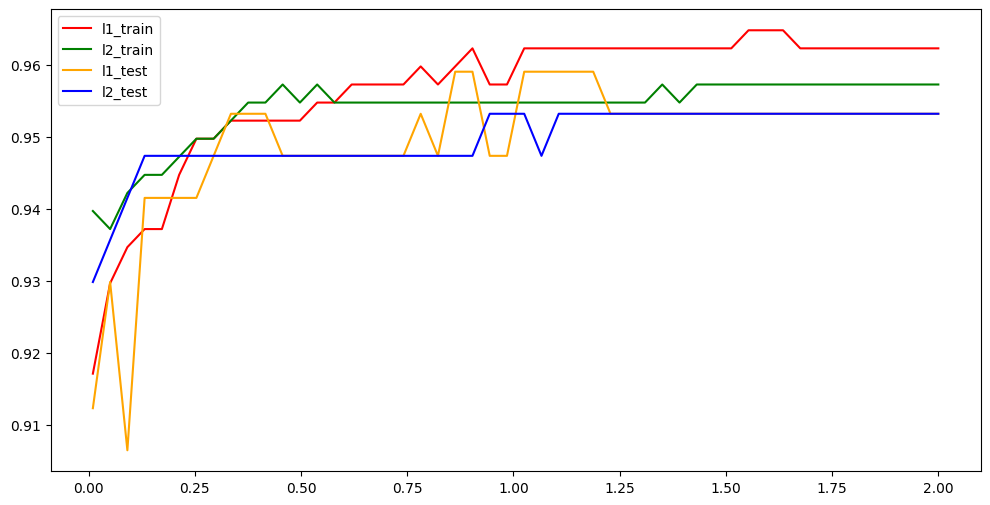

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer # 乳腺癌数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
data = load_breast_cancer()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr_l1 = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
lr_l2 = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")

lr_l1.fit(X_train, y_train)
lr_l2.fit(X_train, y_train)

l1_train_predict = []
l2_train_predict = []

l1_test_predict = []
l2_test_predict = []

for c in np.linspace(0.01, 2, 50) :
    lr_l1 = LogisticRegression(penalty="l1", C=c, solver="liblinear", max_iter=1000)
    lr_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=1000)
    lr_l1.fit(X_train, y_train)
    l1_train_predict.append(accuracy_score(lr_l1.predict(X_train), y_train))
    l1_test_predict.append(accuracy_score(lr_l1.predict(X_test), y_test))
    lr_l2.fit(X_train, y_train)
    l2_train_predict.append(accuracy_score(lr_l2.predict(X_train), y_train))
    l2_test_predict.append(accuracy_score(lr_l2.predict(X_test), y_test))
    
data = [l1_train_predict, l2_train_predict, l1_test_predict, l2_test_predict]
label = ['l1_train', 'l2_train', 'l1_test', "l2_test"]
color = ['red', 'green', 'orange', 'blue']

plt.figure(figsize=(12, 6))
for i in range(4) :
    plt.plot(np.linspace(0.01, 2, 50), data[i], label=label[i], color=color[i])

plt.legend(loc="best")
plt.show()